In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
file_to_plot = '2023_07_15 04_43_10.pk'
print(file_to_plot)
results = pickle.load(open('./cosmotrans_out/' + file_to_plot, 'rb'))
params = results[0]
thermal_params = results[1]
print(params)
print(thermal_params)

2023_07_15 04_43_10.pk
{'a': 0, 'b': array([-2.0001, -2.    ]), 'c': array([ 9.9999, 10.    ]), 'Lambda': array([1.]), 'c1': array([7.]), 'f': array([[[-0.40008001, -0.34292572, -0.28577143, -0.22861715,
         -0.17146286, -0.11430857, -0.05715429,  0.        ,
          0.05715429,  0.11430857,  0.17146286,  0.22861715,
          0.28577143,  0.34292572,  0.40008001],
        [-0.4       , -0.34285714, -0.28571429, -0.22857143,
         -0.17142857, -0.11428571, -0.05714286,  0.        ,
          0.05714286,  0.11428571,  0.17142857,  0.22857143,
          0.28571429,  0.34285714,  0.4       ]],

       [[-0.40008001, -0.34292572, -0.28577143, -0.22861715,
         -0.17146286, -0.11430857, -0.05715429,  0.        ,
          0.05715429,  0.11430857,  0.17146286,  0.22861715,
          0.28577143,  0.34292572,  0.40008001],
        [-0.4       , -0.34285714, -0.28571429, -0.22857143,
         -0.17142857, -0.11428571, -0.05714286,  0.        ,
          0.05714286,  0.11428571,  0

[-0.4        -0.34285714 -0.28571429 -0.22857143 -0.17142857 -0.11428571
 -0.05714286  0.          0.05714286  0.11428571  0.17142857  0.22857143
  0.28571429  0.34285714  0.4       ] [0.273904259449775, 0.27396362690616927, 0.27402904020124763, 0.2740942720069931, 0.27416011424099357, 0.2742264376232051, 0.2742931652286097, 0.2743600849216966, 0.2746780937270631, 0.27499579977733535, 0.27506839741264116, 0.27513295150682365, 0.27520499825320954, 0.27529218717175863, 0.27539059476116357] [3.6696909594282796, 3.664606935268221, 3.6542359736584373, 3.6382313800151644, 3.651382970206763, 3.6443140547752986, 3.652577803102474, 3.6509620775562004, 3.664000650727235, 3.7032956489356734, 3.6925506654771167, 3.671703007290534, 3.6946094767790534, 3.677312513240808, nan] [6.909443396114535, 6.892855161829709, 6.872260281579236, 6.871709928587589, 6.8521475573011426, 6.83926939788619, 6.849443083988812, 6.801106308048616, 6.804032307238776, 6.804291680981268, 6.814262924927073, 6.828286616165379

/tmp/ipykernel_67022/1600186605.py:23: RuntimeWarning: invalid value encountered in log10
  plot_logbetaHs.append(np.log10(thermal_params[p1i, p2i]['betaHs'][bi, ci, di]))
/tmp/ipykernel_67022/1600186605.py:26: RuntimeWarning: invalid value encountered in log10
  ax[1].scatter(params['f'][bi,ci,di], np.log10(thermal_params[p1i, p2i]['betaHs'][bi, ci, di]))


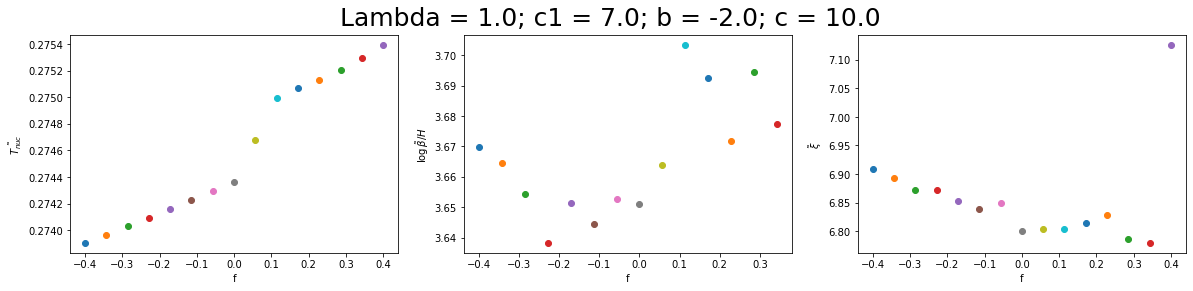

In [3]:
const_params = ['Lambda', 'c1']
plot_Tnucs = []
plot_logbetaHs = []
plot_ksis = []

for p1i in range(np.size(params[const_params[0]])):
    for p2i in range(np.size(params[const_params[1]])):
        bi = int(np.floor(params['b'].size/2))
        ci = int(np.floor(params['c'].size/2))
        title = f"{const_params[0]} = {params[const_params[0]][p1i]}; {const_params[1]} = {params[const_params[1]][p2i]}; b = {params['b'][bi]}; c = {params['c'][ci]}"
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 4))
        fig.suptitle(title, fontsize = 25)
        ax[0].set_ylabel(r'$\tilde{T_{nuc}}$')
        ax[0].set_xlabel('f')
        ax[1].set_ylabel(r'$\log\tilde{\beta}/H$')
        ax[1].set_xlabel('f')
        ax[2].set_ylabel(r'$\tilde{\xi}$')
        ax[2].set_xlabel('f')
        for di in range(np.size(params['f'][bi,ci,:])):
            #thermal_params[p1i, p2i]['Tnucs'][thermal_params[p1i, p2i]['Tnucs'] == 0] = np.nan
            #thermal_params[p1i, p2i]['ksis'][thermal_params[p1i, p2i]['ksis'] == 0 ] = np.nan
            plot_Tnucs.append(thermal_params[p1i, p2i]['Tnucs'][bi, ci, di])
            plot_logbetaHs.append(np.log10(thermal_params[p1i, p2i]['betaHs'][bi, ci, di]))
            plot_ksis.append(thermal_params[p1i, p2i]['ksis'][bi, ci, di])
            ax[0].scatter(params['f'][bi,ci,di], thermal_params[p1i, p2i]['Tnucs'][bi, ci, di])
            ax[1].scatter(params['f'][bi,ci,di], np.log10(thermal_params[p1i, p2i]['betaHs'][bi, ci, di]))
            ax[2].scatter(params['f'][bi,ci,di], thermal_params[p1i, p2i]['ksis'][bi, ci, di])

print(params['f'][bi,ci,:], plot_Tnucs, plot_logbetaHs, plot_ksis)